# Checkpoint Five: Modeling Data

With your visualizations ready to go, the final step in your project is to do some predictive analysis on your dataset. You will be using linear regression for your model. You will not be penalized if your linear regression model does not work out. You just need to build the model and make notes as to the results.

Link to my dataset:

## Prepare Your Dataframe

Import any libraries you need and create a dataframe.

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import scipy as sp
from scipy.stats import pearsonr

churn=pd.read_csv('C:/Users/emmag/Desktop/Women+/archive (16)/churn_clean.csv')
votes=pd.read_csv('C:/Users/emmag/Desktop/Women+/archive (16)/votes_clean.csv')

In [3]:
#adjusting options to see more data
pd.set_option('display.max_rows', 5000)

In [4]:
churn["companyAlias"].value_counts()

54e52607e4b01191dc064966    585
58a728a0e75bda00042a3468    379
56aec740f1ef260003e307d6    353
574c5ade56b6300003009965    293
57ac8b23be7fe30003e656d0    259
5370af43e4b0cff95558c12a    224
5641f96713664c000332c8cd    224
57dd2d6a4018d9000339ca43    221
5742d699f839a10003a407d2    194
57d956302a040a00036a8905    171
567011c035dce00003a07fa4    165
53a2dd43e4b01cc02f1e9011    144
581b08041a0ef8000308aef6    140
574c423856b6300003009953    139
57bb2f0b3bae540003a8d453    135
56e2a905e3b6fe0003e32855    101
5809cc9eff2ea40003fda44d     76
56fd2b64f41c670003f643c8     75
573f2c4a3517490003ef7710     67
58c6e15f32f72a00046f556c     60
57d1eb86a22c9d0003dd1f05     50
57c4aa7dbb8b5c000396fd3b     48
57908a2622881200033b34d7     48
5809cde3ff2ea40003fda452     44
56ab28dc1f385d0003454757     34
552e2d00e4b066b42fd122ed     29
57fcf18712cdbd000396e310     24
54d43612e4b0f6a40755d93e     21
58b9adfce75bf80004df6536     21
56ae7b02f1ef260003e3072c     20
57d979b72a040a00036a8925     18
58b471b3

In [5]:
#in order to properly look for correlations, I need to add in a calculated field that I've previously added into Tableau
#I'll start by converting the Boolean values in the stillExists column to numeric values
churn.stillExists = churn.stillExists.replace({True: 0, False: 1})
churn.head()

Unnamed: 0  employee              companyAlias  numVotes  \
0           0       512  56aec740f1ef260003e307d6         4   
1           2         2  56aec740f1ef260003e307d6        72   
2           3       487  56aec740f1ef260003e307d6        14   
3           4         3  56aec740f1ef260003e307d6        22   
4           6         4  56aec740f1ef260003e307d6       195   

  lastParticipationDate  stillExists lastParticipationMonthYear  
0   2017-02-23 12:48:04            0                 2017-02-01  
1   2017-03-17 01:00:00            0                 2017-03-01  
2   2016-11-19 15:02:14            1                 2016-11-01  
3   2017-02-16 01:00:00            0                 2017-02-01  
4   2017-03-20 01:00:00            0                 2017-03-01

In [6]:
#next, I'll need to calculate the churn rate by summing stillExists and dividing it by the count of stillExists
#first step is to calculate the stillExists count by company
churn['churnCount'] = churn['stillExists'].groupby(churn['companyAlias']).transform('sum')
#next step is to calculate the still Exists sum by company
churn['churnSum'] = churn['stillExists'].groupby(churn['companyAlias']).transform('count')
#final step is to create the churn rate column by dividing sum by count
churn['churnRate']=churn['churnCount']/churn['churnSum']
churn

Unnamed: 0  employee              companyAlias  numVotes  \
0              0       512  56aec740f1ef260003e307d6         4   
1              2         2  56aec740f1ef260003e307d6        72   
2              3       487  56aec740f1ef260003e307d6        14   
3              4         3  56aec740f1ef260003e307d6        22   
4              6         4  56aec740f1ef260003e307d6       195   
5              7       516  56aec740f1ef260003e307d6        29   
6              8       475  56aec740f1ef260003e307d6        15   
7              9         5  56aec740f1ef260003e307d6        42   
8             10       517  56aec740f1ef260003e307d6        16   
9             12         6  56aec740f1ef260003e307d6        63   
10            13       518  56aec740f1ef260003e307d6        56   
11            14        14  56aec740f1ef260003e307d6         9   
12            15         7  56aec740f1ef260003e307d6        53   
13            16         8  56aec740f1ef260003e307d6        29   
14            17       520  56aec740f1ef260003e307d6        22   
15            18         9  56aec740f1ef260003e307d6         3   
16            19        10  56aec740f1ef260003e307d6        56   
17            20        11  56aec740f1ef260003e307d6        11   
18            21       523  56aec740f1ef260003e307d6        18   
19            22        12  56aec740f1ef260003e307d6        69   
20            23        13  56aec740f1ef260003e307d6        76   
21            24        14  56aec740f1ef260003e307d6         9   
22            25        16  56aec740f1ef260003e307d6        90   
23            26        17  56aec740f1ef260003e307d6         6   
24            27       529  56aec740f1ef260003e307d6        27   
25            28        18  56aec740f1ef260003e307d6       170   
26            29        19  56aec740f1ef260003e307d6       100   
27            30       531  56aec740f1ef260003e307d6        19   
28            31        20  56aec740f1ef260003e307d6        74   
29            32        21  56aec740f1ef260003e307d6       191   
30            33        22  56aec740f1ef260003e307d6        67   
31            34        23  56aec740f1ef260003e307d6        56   
32            35        24  56aec740f1ef260003e307d6       404   
33            36        25  56aec740f1ef260003e307d6       100   
34            37        26  56aec740f1ef260003e307d6       262   
35            38       538  56aec740f1ef260003e307d6        14   
36            39        27  56aec740f1ef260003e307d6       124   
37            40       539  56aec740f1ef260003e307d6         3   
38            41        28  56aec740f1ef260003e307d6       137   
39            42        29  56aec740f1ef260003e307d6        45   
40            43        30  56aec740f1ef260003e307d6        43   
41            44        31  56aec740f1ef260003e307d6        53   
42            45        32  56aec740f1ef260003e307d6       182   
43            46        33  56aec740f1ef260003e307d6       253   
44            47        34  56aec740f1ef260003e307d6       369   
45            48        36  56aec740f1ef260003e307d6       212   
46            49        38  56aec740f1ef260003e307d6        64   
47            50        40  56aec740f1ef260003e307d6         2   
48            51        41  56aec740f1ef260003e307d6        11   
49            52        43  56aec740f1ef260003e307d6        46   
50            53        44  56aec740f1ef260003e307d6         1   
51            54        45  56aec740f1ef260003e307d6        20   
52            55        47  56aec740f1ef260003e307d6        16   
53            56        51  56aec740f1ef260003e307d6        79   
54            57        52  56aec740f1ef260003e307d6       142   
55            58        54  56aec740f1ef260003e307d6         7   
56            59        55  56aec740f1ef260003e307d6        13   
57            60        58  56aec740f1ef260003e307d6       150   
58            61        59  56aec740f1ef260003e307d6       151   
59            62        61  56aec740f1ef260003

In [7]:
#I'll also need to add in fields that were aggregated using Tableau. I'll start with company size
churn['companySize'] = churn['employee'].groupby(churn['companyAlias']).transform('count')
churn

Unnamed: 0  employee              companyAlias  numVotes  \
0              0       512  56aec740f1ef260003e307d6         4   
1              2         2  56aec740f1ef260003e307d6        72   
2              3       487  56aec740f1ef260003e307d6        14   
3              4         3  56aec740f1ef260003e307d6        22   
4              6         4  56aec740f1ef260003e307d6       195   
5              7       516  56aec740f1ef260003e307d6        29   
6              8       475  56aec740f1ef260003e307d6        15   
7              9         5  56aec740f1ef260003e307d6        42   
8             10       517  56aec740f1ef260003e307d6        16   
9             12         6  56aec740f1ef260003e307d6        63   
10            13       518  56aec740f1ef260003e307d6        56   
11            14        14  56aec740f1ef260003e307d6         9   
12            15         7  56aec740f1ef260003e307d6        53   
13            16         8  56aec740f1ef260003e307d6        29   
14            17       520  56aec740f1ef260003e307d6        22   
15            18         9  56aec740f1ef260003e307d6         3   
16            19        10  56aec740f1ef260003e307d6        56   
17            20        11  56aec740f1ef260003e307d6        11   
18            21       523  56aec740f1ef260003e307d6        18   
19            22        12  56aec740f1ef260003e307d6        69   
20            23        13  56aec740f1ef260003e307d6        76   
21            24        14  56aec740f1ef260003e307d6         9   
22            25        16  56aec740f1ef260003e307d6        90   
23            26        17  56aec740f1ef260003e307d6         6   
24            27       529  56aec740f1ef260003e307d6        27   
25            28        18  56aec740f1ef260003e307d6       170   
26            29        19  56aec740f1ef260003e307d6       100   
27            30       531  56aec740f1ef260003e307d6        19   
28            31        20  56aec740f1ef260003e307d6        74   
29            32        21  56aec740f1ef260003e307d6       191   
30            33        22  56aec740f1ef260003e307d6        67   
31            34        23  56aec740f1ef260003e307d6        56   
32            35        24  56aec740f1ef260003e307d6       404   
33            36        25  56aec740f1ef260003e307d6       100   
34            37        26  56aec740f1ef260003e307d6       262   
35            38       538  56aec740f1ef260003e307d6        14   
36            39        27  56aec740f1ef260003e307d6       124   
37            40       539  56aec740f1ef260003e307d6         3   
38            41        28  56aec740f1ef260003e307d6       137   
39            42        29  56aec740f1ef260003e307d6        45   
40            43        30  56aec740f1ef260003e307d6        43   
41            44        31  56aec740f1ef260003e307d6        53   
42            45        32  56aec740f1ef260003e307d6       182   
43            46        33  56aec740f1ef260003e307d6       253   
44            47        34  56aec740f1ef260003e307d6       369   
45            48        36  56aec740f1ef260003e307d6       212   
46            49        38  56aec740f1ef260003e307d6        64   
47            50        40  56aec740f1ef260003e307d6         2   
48            51        41  56aec740f1ef260003e307d6        11   
49            52        43  56aec740f1ef260003e307d6        46   
50            53        44  56aec740f1ef260003e307d6         1   
51            54        45  56aec740f1ef260003e307d6        20   
52            55        47  56aec740f1ef260003e307d6        16   
53            56        51  56aec740f1ef260003e307d6        79   
54            57        52  56aec740f1ef260003e307d6       142   
55            58        54  56aec740f1ef260003e307d6         7   
56            59        55  56aec740f1ef260003e307d6        13   
57            60        58  56aec740f1ef260003e307d6       150   
58            61        59  56aec740f1ef260003e307d6       151   
59            62        61  56aec740f1ef260003

In [8]:
#Next, I'll add what I'm considering an indicator of engagement, average number of votes per employee
churn['engagementByVotes'] = churn['numVotes'].groupby(churn['companyAlias']).transform('mean')
churn

Unnamed: 0  employee              companyAlias  numVotes  \
0              0       512  56aec740f1ef260003e307d6         4   
1              2         2  56aec740f1ef260003e307d6        72   
2              3       487  56aec740f1ef260003e307d6        14   
3              4         3  56aec740f1ef260003e307d6        22   
4              6         4  56aec740f1ef260003e307d6       195   
5              7       516  56aec740f1ef260003e307d6        29   
6              8       475  56aec740f1ef260003e307d6        15   
7              9         5  56aec740f1ef260003e307d6        42   
8             10       517  56aec740f1ef260003e307d6        16   
9             12         6  56aec740f1ef260003e307d6        63   
10            13       518  56aec740f1ef260003e307d6        56   
11            14        14  56aec740f1ef260003e307d6         9   
12            15         7  56aec740f1ef260003e307d6        53   
13            16         8  56aec740f1ef260003e307d6        29   
14            17       520  56aec740f1ef260003e307d6        22   
15            18         9  56aec740f1ef260003e307d6         3   
16            19        10  56aec740f1ef260003e307d6        56   
17            20        11  56aec740f1ef260003e307d6        11   
18            21       523  56aec740f1ef260003e307d6        18   
19            22        12  56aec740f1ef260003e307d6        69   
20            23        13  56aec740f1ef260003e307d6        76   
21            24        14  56aec740f1ef260003e307d6         9   
22            25        16  56aec740f1ef260003e307d6        90   
23            26        17  56aec740f1ef260003e307d6         6   
24            27       529  56aec740f1ef260003e307d6        27   
25            28        18  56aec740f1ef260003e307d6       170   
26            29        19  56aec740f1ef260003e307d6       100   
27            30       531  56aec740f1ef260003e307d6        19   
28            31        20  56aec740f1ef260003e307d6        74   
29            32        21  56aec740f1ef260003e307d6       191   
30            33        22  56aec740f1ef260003e307d6        67   
31            34        23  56aec740f1ef260003e307d6        56   
32            35        24  56aec740f1ef260003e307d6       404   
33            36        25  56aec740f1ef260003e307d6       100   
34            37        26  56aec740f1ef260003e307d6       262   
35            38       538  56aec740f1ef260003e307d6        14   
36            39        27  56aec740f1ef260003e307d6       124   
37            40       539  56aec740f1ef260003e307d6         3   
38            41        28  56aec740f1ef260003e307d6       137   
39            42        29  56aec740f1ef260003e307d6        45   
40            43        30  56aec740f1ef260003e307d6        43   
41            44        31  56aec740f1ef260003e307d6        53   
42            45        32  56aec740f1ef260003e307d6       182   
43            46        33  56aec740f1ef260003e307d6       253   
44            47        34  56aec740f1ef260003e307d6       369   
45            48        36  56aec740f1ef260003e307d6       212   
46            49        38  56aec740f1ef260003e307d6        64   
47            50        40  56aec740f1ef260003e307d6         2   
48            51        41  56aec740f1ef260003e307d6        11   
49            52        43  56aec740f1ef260003e307d6        46   
50            53        44  56aec740f1ef260003e307d6         1   
51            54        45  56aec740f1ef260003e307d6        20   
52            55        47  56aec740f1ef260003e307d6        16   
53            56        51  56aec740f1ef260003e307d6        79   
54            57        52  56aec740f1ef260003e307d6       142   
55            58        54  56aec740f1ef260003e307d6         7   
56            59        55  56aec740f1ef260003e307d6        13   
57            60        58  56aec740f1ef260003e307d6       150   
58            61        59  56aec740f1ef260003e307d6       151   
59            62        61  56aec740f1ef260003

In [9]:
#Finally, I'll add average happiness rating by employees per company
votes['avgHappinessRating'] = votes['vote'].groupby(votes['companyAlias']).transform('mean')
votes

Unnamed: 0  employee              companyAlias             voteDate  \
0                0        31  56aec740f1ef260003e307d6  2016-02-01 01:00:00   
1                1        33  56aec740f1ef260003e307d6  2016-02-01 01:00:00   
2                2        79  56aec740f1ef260003e307d6  2016-02-01 01:00:00   
3                3        94  56aec740f1ef260003e307d6  2016-02-01 01:00:00   
4                4        16  56aec740f1ef260003e307d6  2016-02-01 01:00:00   
...            ...       ...                       ...                  ...   
221140      221227        17  573a0671b5ec330003add34a  2016-06-03 02:00:00   
221141      221228        17  573a0671b5ec330003add34a  2016-06-07 02:00:00   
221142      221229        17  573a0671b5ec330003add34a  2016-06-13 02:00:00   
221143      221230        17  573a0671b5ec330003add34a  2016-06-28 02:00:00   
221144      221231        19  573a0671b5ec330003add34a  2016-07-04 02:00:00   

        vote voteMonthYear  avgHappinessRating  
0          4    2016-02-01             3.23647  
1          4    2016-02-01             3.23647  
2          4    2016-02-01             3.23647  
3          4    2016-02-01             3.23647  
4          2    2016-02-01             3.23647  
...      ...           ...                 ...  
221140     3    2016-06-01             3.62500  
221141     4    2016-06-01             3.62500  
221142     4    2016-06-01             3.62500  
221143     4    2016-06-01             3.62500  
221144     4    2016-07-01             3.62500  

[221145 rows x 7 columns]

## Find Correlations

Use either pairplot or a heatmap or both to find the two variables with the strongest correlation in your dataset.

In [10]:
#because my variables are included in two different tables, I'll need to join them first
combo=pd.merge(churn,votes,on=['employee','companyAlias'])
combo

Unnamed: 0_x  employee              companyAlias  numVotes  \
0                  0       512  56aec740f1ef260003e307d6         4   
1                  0       512  56aec740f1ef260003e307d6         4   
2                  0       512  56aec740f1ef260003e307d6         4   
3                  0       512  56aec740f1ef260003e307d6         4   
4                  2         2  56aec740f1ef260003e307d6        72   
...              ...       ...                       ...       ...   
222878          4845        17  573a0671b5ec330003add34a         7   
222879          4845        17  573a0671b5ec330003add34a         7   
222880          4845        17  573a0671b5ec330003add34a         7   
222881          4845        17  573a0671b5ec330003add34a         7   
222882          4846        19  573a0671b5ec330003add34a         1   

       lastParticipationDate  stillExists lastParticipationMonthYear  \
0        2017-02-23 12:48:04            0                 2017-02-01   
1        2017-02-23 12:48:04            0                 2017-02-01   
2        2017-02-23 12:48:04            0                 2017-02-01   
3        2017-02-23 12:48:04            0                 2017-02-01   
4        2017-03-17 01:00:00            0                 2017-03-01   
...                      ...          ...                        ...   
222878   2016-06-28 02:00:00            0                 2016-06-01   
222879   2016-06-28 02:00:00            0                 2016-06-01   
222880   2016-06-28 02:00:00            0                 2016-06-01   
222881   2016-06-28 02:00:00            0                 2016-06-01   
222882   2016-07-04 19:02:03            0                 2016-07-01   

        churnCount  churnSum  churnRate  companySize  engagementByVotes  \
0               28       353    0.07932          353          75.903683   
1               28       353    0.07932          353          75.903683   
2               28       353    0.07932          353          75.903683   
3               28       353    0.07932          353          75.903683   
4               28       353    0.07932          353          75.903683   
...            ...       ...        ...          ...                ...   
222878           0         2    0.00000            2           4.000000   
222879           0         2    0.00000            2           4.000000   
222880           0         2    0.00000            2           4.000000   
222881           0         2    0.00000            2           4.000000   
222882           0         2    0.00000            2           4.000000   

        Unnamed: 0_y             voteDate  vote voteMonthYear  \
0              21107  2017-01-17 01:00:00     3    2017-01-01   
1              21597  2017-01-23 01:00:00     2    2017-01-01   
2              24245  2017-02-21 01:00:00     1    2017-02-01   
3              24532  2017-02-23 01:00:00     4    2017-02-01   
4                 65  2016-02-05 01:00:00     2    2016-02-01   
...              ...                  ...   ...           ...   
222878        221227  2016-06-03 02:00:00     3    2016-06-01   
222879        221228  2016-06-07 02:00:00     4    2016-06-01   
222880        221229  2016-06-13 02:00:00     4    2016-06-01   
222881        221230  2016-06-28 02:00:00     4    2016-06-01   
222882        221231  2016-07-04 02:00:00     4    2016-07-01   

        avgHappinessRating  
0                  3.23647  
1                  3.23647  
2                  3.23647  
3                  3.23647  
4                  3.23647  
...                    ...  
222878             3.62500  
222879             3.62500  
222880             3.62500  
222881             3.62500  
222882             3.62500  

[222883 rows x 17 columns]

In [11]:
#in order to ensure the statistics running have the correct N value (37 as opposed to 222883), I'll need to create a new,
#grouped, dataframe
grouped=combo.groupby(['companyAlias']).mean()
grouped

C:\Users\emmag\AppData\Local\Temp\ipykernel_28056\1827110031.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped=combo.groupby(['companyAlias']).mean()


Unnamed: 0_x    employee    numVotes  stillExists  \
companyAlias                                                                  
5370af43e4b0cff95558c12a    525.625571  101.992442   98.588884     0.599433   
53a2dd43e4b01cc02f1e9011   3510.895085  115.118590   95.202991     0.066880   
5474b9cde4b0bf7614b2c66f   2834.739130    7.500000   12.956522     0.000000   
54d43612e4b0f6a40755d93e    365.259912    8.561674   54.812775     0.158590   
54e52607e4b01191dc064966   1842.784654  298.774726  251.484894     0.382614   
552e2d00e4b066b42fd122ed   1113.141361   23.547120   27.128272     0.162304   
5641f96713664c000332c8cd   2616.479102  152.226295  182.015285     0.103022   
56558cfd07a5de00030908fb   2846.000000    8.000000    3.500000     0.000000   
567011c035dce00003a07fa4    935.368115  119.641295   68.201495     0.029338   
56ab28dc1f385d0003454757   3698.542484   54.954248    8.816993     0.261438   
56ae7b02f1ef260003e3072c   3677.547619   14.928571    7.333333     0.000000   
56aec740f1ef260003e307d6    165.511458  201.787452  162.483616     0.043219   
56e2a905e3b6fe0003e32855   2931.644474   34.749018  151.283523     0.000000   
56fd2b64f41c670003f643c8   2785.712982   37.583160  141.623827     0.094369   
573a0671b5ec330003add34a   4845.125000   17.250000    6.250000     0.000000   
573f2c4a3517490003ef7710   3610.149215   39.206806   14.287958     0.001309   
5742d699f839a10003a407d2   4072.954204   96.581969  187.317097     0.028508   
574c423856b6300003009953   1334.492877   72.115516   97.545370     0.062248   
574c5ade56b6300003009965   3213.258261  179.058688  111.233566     0.027656   
57908a2622881200033b34d7   1437.898352   20.732143   61.263736     0.061813   
57ac8b23be7fe30003e656d0   3845.145032  163.776467   50.591585     0.011630   
57bb2f0b3bae540003a8d453    776.186822   79.028372   91.032248     0.004496   
57c4aa7dbb8b5c000396fd3b   2874.718713   28.030994   94.554971     0.029532   
57d1eb86a22c9d0003dd1f05   3044.700864   22.291620   82.756483     0.169861   
57d956302a040a00036a8905   4274.412953  157.893396   61.897580     0.000000   
57d979b72a040a00036a8925   2505.000000   10.162304   23.513089     0.000000   
57dd2d6a4018d9000339ca43   2388.095108  163.752940  105.926709     0.036987   
57e518026d641600035db88a   4355.716981    9.245283    7.830189     0.000000   
57fcf18712cdbd000396e310   3011.474227   30.010309    5.494845     0.000000   
5809cc9eff2ea40003fda44d   1057.340013   63.938544   40.234469     0.000000   
5809cde3ff2ea40003fda452   4383.630000   23.777500   44.168333     0.000000   
581b08041a0ef8000308aef6   1199.016393  122.806130   50.178902     0.026610   
58a728a0e75bda00042a3468   4638.785910  368.498904   14.023026     0.079221   
58b471b384db3200044dd1b9   2747.793478    8.913043    8.239130     0.000000   
58b9adfce75bf80004df6536   3653.913580   11.870370    9.617284     0.000000   
58bf03e5cff4fa0004dd44ef   4409.133333   15.800000    2.600000     0.000000   
58c6e15f32f72a00046f556c   3397.936508   31.952381    1.095238     0.000000   

                          churnCount  churnSum  churnRate  companySize  \
companyAlias                                                             
5370af43e4b0cff95558c12a       173.0     224.0   0.772321        224.0   
53a2dd43e4b01cc02f1e9011        12.0     144.0   0.083333        144.0   
5474b9cde4b0bf7614b2c66f         0.0      10.0   0.000000         10.0   
54d43612e4b0f6a40755d93e         7.0      21.0   0.333333         21.0   
54e52607e4b01191dc064966       288.0     585.0   0.492308        585.0   
552e2d00e4b066b42fd122ed         4.0      29.0   0.137931         29.0   
5641f96713664c000332c8cd        39.0     224.0   0.174107        224.0   
56558cfd07a5de00030908fb         0.0      12.0   0.000000         12.0   
567011c035dce00003a07fa4        11.0     165.0   0.066667        165.0   
56ab28dc1f385d0003454757         2.0      34.0   0.058824         34.0   
56ae7b02f1ef260003e3072c         0.0      20.0   0.00000

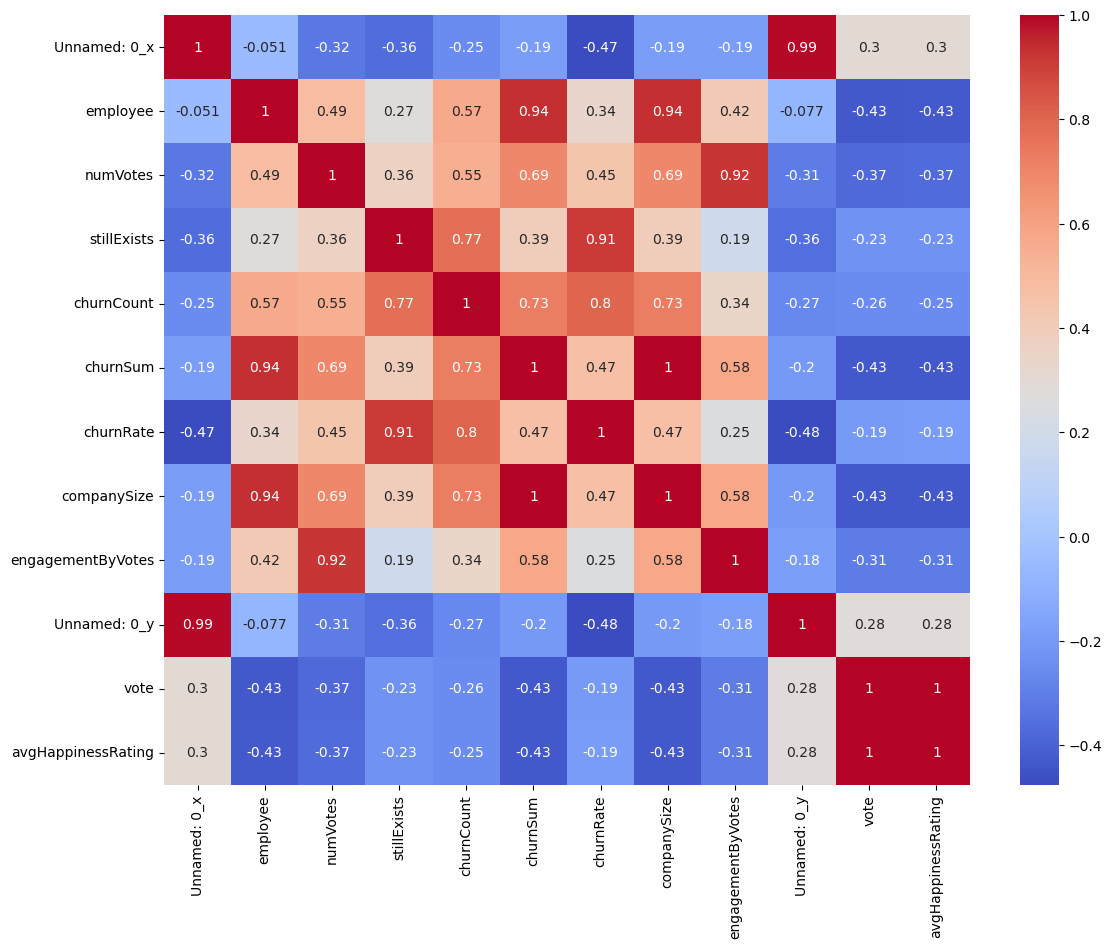

In [13]:
#next, I'll use a heatmap to determine strength of correlations
corr = grouped.corr()
_, ax = plt.subplots(figsize=(13,10)) 

# graph correlation matrix
_ = sns.heatmap(corr, ax=ax,
                xticklabels=corr.columns.values,
                yticklabels=corr.columns.values,
                cmap='coolwarm', annot = True)

In [64]:
#based on this heatmap, the most strongly correlated variables are companySize & engagementByVotes and companySize & churnRate
#let's get the specific values
grouped[['companySize', 'engagementByVotes']].corr()
#companySize & engagementByVotes has a .57 correlation, meaning the larger a company gets, the more votes its employees cast
#perhaps due to feeling more certain of anonymity 


companySize  engagementByVotes
companySize           1.000000           0.576564
engagementByVotes     0.576564           1.000000

In [66]:
#is this value significant? let's find the p value
pearsonr(grouped['companySize'], grouped['engagementByVotes'])
#P-value=0.000187, the result is significant at p < .05.

PearsonRResult(statistic=0.5765644245292083, pvalue=0.00018774737380693822)

In [55]:
grouped[['companySize', 'churnRate']].corr()
#companySize & churnRate has a .72 correlation, meaning that the larger a company gets, the higher their turnover rate

companySize  churnRate
companySize     1.000000   0.472521
churnRate       0.472521   1.000000

In [56]:
pearsonr(grouped['churnRate'], grouped['companySize'])
#P-value=0.00314, the result is significant at p < .05.

PearsonRResult(statistic=0.47252133218050585, pvalue=0.00314615175919218)

In [67]:
#my hypothesis was that I would find a strong correlation between churnRate and avgHappinessRating, let's see what it is
grouped[['avgHappinessRating', 'churnRate']].corr()
#it's a -.193, a negative correlation but not a strong one

avgHappinessRating  churnRate
avgHappinessRating            1.000000  -0.193171
churnRate                    -0.193171   1.000000

In [59]:
pearsonr(grouped['churnRate'], grouped['avgHappinessRating'])
#P-value=0.25, the result is NOT significant at p < .05.

PearsonRResult(statistic=-0.19317084650591465, pvalue=0.25199700826328036)

In [68]:
#another correlation I noticed visually was that between companySize and avgHappinessRatings
grouped[['companySize', 'avgHappinessRating']].corr()
#r value is -.43, meaning that the larger a company gets, the less happier their employees are

companySize  avgHappinessRating
companySize            1.000000           -0.430228
avgHappinessRating    -0.430228            1.000000

In [69]:
pearsonr(grouped['companySize'], grouped['avgHappinessRating'])
#P-value=.00786, the result is significant at p < .05.

PearsonRResult(statistic=-0.43022835298580103, pvalue=0.007864228308067834)

## Create Your Model

Use the two columns with the strongest correlation to create and train your model. Make sure to print out the summary and plot the column values and the line produced by the model.

In [20]:
X = grouped['companySize']
Y = grouped['engagementByVotes']

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y)
X_train
Y_train

companyAlias
57bb2f0b3bae540003a8d453     47.777778
5809cc9eff2ea40003fda44d     19.697368
5809cde3ff2ea40003fda452     27.272727
58bf03e5cff4fa0004dd44ef      1.666667
57fcf18712cdbd000396e310      4.041667
58a728a0e75bda00042a3468      9.625330
57e518026d641600035db88a      5.888889
57c4aa7dbb8b5c000396fd3b     71.250000
573a0671b5ec330003add34a      4.000000
54e52607e4b01191dc064966     87.622222
54d43612e4b0f6a40755d93e     21.190476
574c423856b6300003009953     46.460432
58b471b384db3200044dd1b9      6.571429
552e2d00e4b066b42fd122ed     12.103448
574c5ade56b6300003009965     57.631399
57ac8b23be7fe30003e656d0     22.575290
56ae7b02f1ef260003e3072c      2.100000
56e2a905e3b6fe0003e32855     52.940594
5641f96713664c000332c8cd    102.803571
53a2dd43e4b01cc02f1e9011     32.500000
56ab28dc1f385d0003454757      4.500000
5742d699f839a10003a407d2    128.804124
57d956302a040a00036a8905     32.146199
5474b9cde4b0bf7614b2c66f      4.600000
57908a2622881200033b34d7     15.041667
56fd2b64f41c

In [22]:
import statsmodels.api as sm

X_train_sm = sm.add_constant(X_train)

lr = sm.OLS(Y_train, X_train_sm).fit()

lr.params
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      engagementByVotes   R-squared:                       0.321
Model:                            OLS   Adj. R-squared:                  0.294
Method:                 Least Squares   F-statistic:                     11.84
Date:                Tue, 17 Oct 2023   Prob (F-statistic):            0.00205
Time:                        18:10:48   Log-Likelihood:                -127.93
No. Observations:                  27   AIC:                             259.9
Df Residuals:                      25   BIC:                             262.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          17.8499      7.462      2.392      0.025       2.481      33.219
companySize     0.1354      0.039      3.441      0.002       0.054       0.216
==============================================================================
Omnibus:                       10.993   Durbin-Watson:                   1.995
Prob(Omnibus):                  0.004   Jarque-Bera (JB):               10.169
Skew:                           1.094   Prob(JB):                      0.00619
Kurtosis:                       5.062   Cond. No.                         256.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

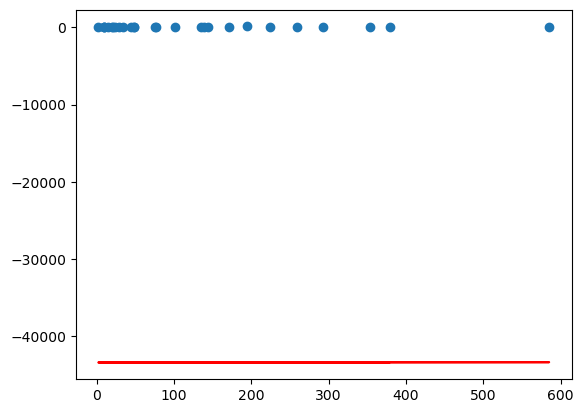

In [23]:
plt.scatter(X_train, Y_train)
plt.plot(X_train, -43440 + 0.0592*X_train, 'r')
plt.show()

## Error Terms

Finally, plot your error terms!

In [24]:
Y_train_pred = lr.predict(X_train_sm)
res = (Y_train - Y_train_pred)

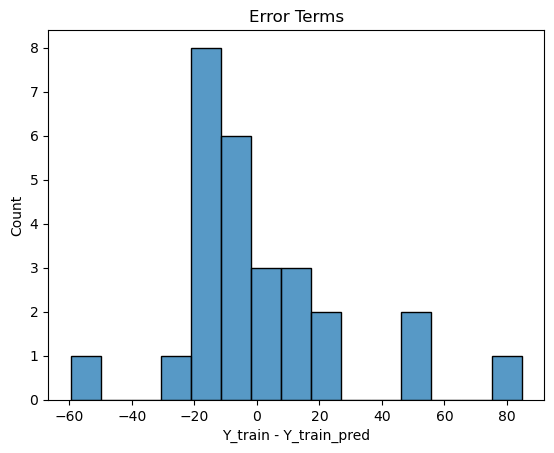

In [25]:
fig = plt.figure()
sns.histplot(res, bins = 15)
plt.title('Error Terms')
plt.xlabel('Y_train - Y_train_pred')
plt.show()

## Summarize Your Work

Make notes of your answers to the questions below.

1. What was your R-squared value? 0.321
2. Based on your results, do you think a linear regression model was the best type of predictive analysis for your dataset? Yes, I think it was appropriate for the type of data I had.
3. Was your plot of the error terms a bell curve? It's bell curve-ish!